In [46]:
from pathlib import Path
import seaborn as sns 
import pandas as pd 

In [47]:
PATH=Path("/data/bacteria/gold-standard-datasets")

In [48]:
df_geba = pd.read_csv(PATH.joinpath("stats-GEBA.csv"),sep="\t", index_col=0)
df_geba["dataset"] = "GEBA"

df_fda = pd.read_csv(PATH.joinpath("stats-FDA-ARGOS.csv"),sep="\t", index_col=0)
df_fda["dataset"] = "FDA-ARGOS"

df_nctc = pd.read_csv(PATH.joinpath("stats-NCTC3000.csv"),sep="\t", index_col=0)
df_nctc["dataset"] = "NCTC3000"

paths_stats_661k = Path("/data/bacteria/datasets/stats-661k-bacteria").rglob("*csv")
df_661k_bacteria = pd.concat([pd.read_csv(p,sep="\t", index_col=0) for p in paths_stats_661k],axis=0)
df_661k_bacteria["dataset"] = "661k-bacteria"
df = pd.concat([df_geba, df_fda, df_nctc, df_661k_bacteria],axis=0)
df.shape

(127572, 7)

In [49]:
df.head()

,path,n_seqs,tot_len,avg_len,std_len,N50,dataset
0,/data/bacteria/gold-standard-datasets/GEBA/ncb...,1,2186370,2.186370e+06,0.000000e+00,2186370.0,GEBA
1,/data/bacteria/gold-standard-datasets/GEBA/ncb...,23,2206431,9.593178e+04,1.066137e+05,210129.0,GEBA
2,/data/bacteria/gold-standard-datasets/GEBA/ncb...,1,3116795,3.116795e+06,0.000000e+00,3116795.0,GEBA
3,/data/bacteria/gold-standard-datasets/GEBA/ncb...,1,1314639,1.314639e+06,0.000000e+00,1314639.0,GEBA
4,/data/bacteria/gold-standard-datasets/GEBA/ncb...,3,4513714,1.504571e+06,1.692431e+06,3881839.0,GEBA


/home/avila/micromamba/envs/train/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='N50', ylabel='Count'>

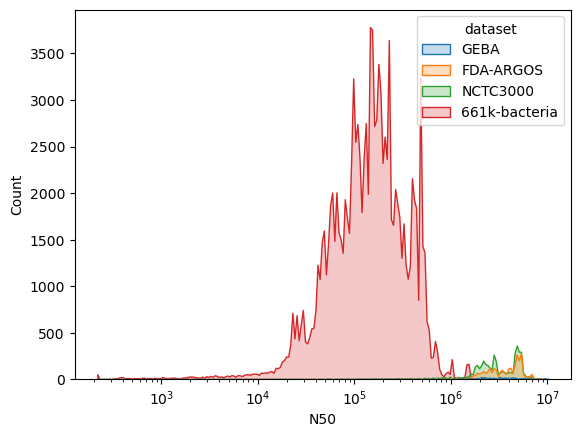

In [51]:
sns.histplot(data=df, x="N50", hue="dataset", element="poly", log_scale=True)

/home/avila/micromamba/envs/train/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


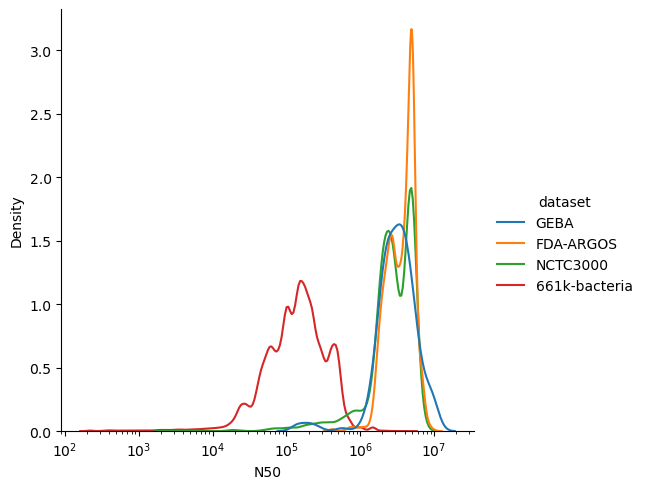

In [71]:
sns.displot(data=df, x="N50", hue="dataset", kind="kde", common_norm=False, log_scale=True)

/home/avila/micromamba/envs/train/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


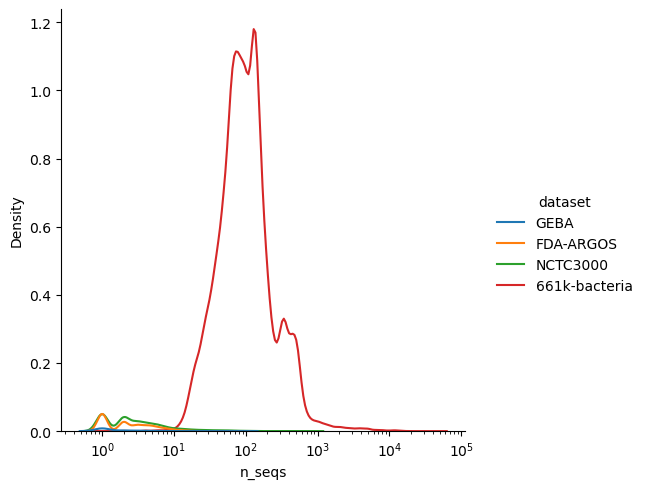

In [53]:
sns.displot(data=df, x="n_seqs", hue="dataset", log_scale=True, kind="kde")